<a href="https://colab.research.google.com/github/xleroux/hello-world/blob/master/XL_DRAFT_Milestone_1_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b>Milestone 1

##<b>Problem Definition</b>
**The context:** Why is this problem important to solve?<br>
**The objectives:** What is the intended goal?<br>
**The key questions:** What are the key questions that need to be answered?<br>
**The problem formulation:** What is it that we are trying to solve using data science?

## <b>Data Description </b>

There are a total of 24,958 train and 2,600 test images (colored) that we have taken from microscopic images. These images are of the following categories:<br>


**Parasitized:** The parasitized cells contain the Plasmodium parasite which causes malaria<br>
**Uninfected:** The uninfected cells are free of the Plasmodium parasites<br>


## <b>Important Notes</b>

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook would give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise. 

- In the notebook, there are markdowns cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques. 

###<b> Mounting the Drive

In [1]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### <b>Loading libraries</b>

In [2]:
# Importing libraries required to load the data
import zipfile

import os 

from PIL import Image

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

# To ignore warnings
import warnings

warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", 200)

### <b>Let us load the data</b>

**Note:** 
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [9]:
# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/cell_images.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:

    zip_ref.extractall()

In [12]:
# xl aux code to confirm test folder contents
os.chdir('/content/drive/MyDrive/cell_images/test')
!ls

parasitized  uninfected


In [14]:
# xl aux code to confirm train folder contents
os.chdir('/content/drive/MyDrive/cell_images/train')
!ls

parasitized  uninfected


The extracted folder has different folders for train and test data which further contains the different sizes of images for parasitized and uninfected cells within the respective folder name. 

The size of all images must be the same and should be converted to 4D arrays so that they can be used as an input for the convolutional neural network. Also, we need to create the labels for both types of images to be able to train and test the model. 

Let's do the same for the training data first and then we will use the same code for the test data as well.

In [17]:
# Storing the path of the extracted "train" folder 
train_dir = '/content/drive/My Drive/cell_images/train'

# Size of image so that each image has the same size
SIZE = 64

# Empty list to store the training images after they are converted to NumPy arrays
train_images = []

# Empty list to store the training labels (0 - uninfected, 1 - parasitized)
train_labels = []

In [18]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "train" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Path of the folder
    images_path = os.listdir(train_dir + folder_name)

    for i, image_name in enumerate(images_path):
    
        try:
    
            # Opening each image using the path of that image
            image = Image.open(train_dir + folder_name + image_name)

            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))

            # Converting images to arrays and appending that array to the empty list defined above
            train_images.append(np.array(image))

            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':
            
                train_labels.append(1)
           
            else:
           
                train_labels.append(0)
        
        except Exception:
       
            pass       

# Converting lists to arrays
train_images = np.array(train_images)

train_labels = np.array(train_labels)

In [21]:
# Storing the path of the extracted "test" folder 
test_dir = '/content/drive/My Drive/cell_images/test'

# Size of image so that each image has the same size (it must be same as the train image size)
SIZE = 64

# Empty list to store the testing images after they are converted to NumPy arrays
test_images = []

# Empty list to store the testing labels (0 - uninfected, 1 - parasitized)
test_labels = []

In [22]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "test" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Path of the folder
    images_path = os.listdir(test_dir + folder_name)

    for i, image_name in enumerate(images_path):

        try:
            # Opening each image using the path of that image
            image = Image.open(test_dir + folder_name + image_name)
            
            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))
            
            # Converting images to arrays and appending that array to the empty list defined above
            test_images.append(np.array(image))
            
            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':

                test_labels.append(1)

            else:

                test_labels.append(0)

        except Exception:

            pass       

# Converting lists to arrays
test_images = np.array(test_images)

test_labels = np.array(test_labels)

###<b> Checking the shape of train and test images

In [23]:
# Shape of images
print("train images shape: ",train_images.shape ,"and test images shape: ", test_images.shape)

train images shape:  (24958, 64, 64, 3) and test images shape:  (2600, 64, 64, 3)


###<b> Checking the shape of train and test labels

In [24]:
# Shape of labels 
print("train labels shape: ",train_labels.shape ,"and test labels shape: ", test_labels.shape)

train labels shape:  (24958,) and test labels shape:  (2600,)


####<b> Observations and insights: _____


### <b>Check the minimum and maximum range of pixel values for train and test images

In [25]:
# Try to use min and max function from numpy

print("The range of pixel values for the train images is (",train_images.min(),",",train_images.max(),").")
print("The range of pixel values for the test images is (",test_images.min(),",",test_images.max(),").")

The range of pixel values for the train images is ( 0 , 255 ).
The range of pixel values for the test images is ( 0 , 255 ).


Let's also find out the range of pixel value sums for the images in each set.

In [28]:
# first for the training  set
mxtrain = 0         # initialize the maximum pixel sum of the training set at 0
mntrain= 3133440    # initialize the minimump pixel sum at the max possible (64x64x3x255)
smtrain = 0         # sum of the ith image in the training set

for i in range(len(train_images)):
  smtrain = int(train_images[i].sum())
  if smtrain > mxtrain:
    mxtrain = smtrain
  if smtrain < mntrain:
    mntrain = smtrain

print("The range of the sum of pixels for the train images is (",mntrain,",",mxtrain,").")

The range of the sum of pixels for the train images is ( 655795 , 1934367 ).


In [32]:
# now for the test  set
mxtest = 0
mntest= 3133440
smtest = 0

for i in range(len(test_images)):
  smtest = int(test_images[i].sum())
  if smtest > mxtest:
    mxtest = smtest
  if smtest < mntest:
    mntest = smtest

print("The range of the sum of pixels for the test images is (",mntest,",",mxtest,").")

The range of the sum of pixels for the test images is ( 725420 , 1769805 ).


####<b> Observations and insights: ####

* a
* b
* 

###<b> Count the number of values in both uninfected and parasitized 

In [33]:
# Try to use value_counts to count the values
# xl: to use value_counts I will first create pd dataframes from the two label arrays

labtrain_df = pd.DataFrame(train_labels,columns=['Outcome'])
labtest_df = pd.DataFrame(test_labels,columns=['Outcome'])

print("Training image counts: \n",labtrain_df.value_counts(),'\n')
print("Testing image counts: \n",labtest_df.value_counts())

Training image counts: 
 Outcome
1          12582
0          12376
dtype: int64 

Testing image counts: 
 Outcome
0          1300
1          1300
dtype: int64


###<b>Normalize the images

In [34]:
# Try to normalize the train and test images by dividing it by 255 and convert them to float32 using astype function
train_images = train_images.astype('float32')/255

test_images = test_images.astype('float32')/255

In [42]:
# xl aux let's look at the range of pixel sums in the train set again
mxtrain = 0
mntrain= 12288    # the product of 64, 64, 3
smtrain = 0   

for i in range(len(train_images)):
  smtrain = int(train_images[i].sum())
  if smtrain > mxtrain:
    mxtrain = smtrain
  if smtrain < mntrain:
    mntrain = smtrain

print("The range of the sum of pixels for the train images is (",mntrain,",",mxtrain,").")


The range of the sum of pixels for the train images is ( 2571 , 7585 ).


In [43]:
# xl aux and a look at the range of pixel sums for the normalized test set
mxtest = 0
mntest= 12288
smtest = 0

for i in range(len(test_images)):
  smtest = int(test_images[i].sum())
  if smtest > mxtest:
    mxtest = smtest
  if smtest < mntest:
    mntest = smtest

print("The range of the sum of pixels for the train images is (",mntest,",",mxtest,").")

The range of the sum of pixels for the train images is ( 2844 , 6940 ).


####<b> Observations and insights: _____

* The range of pixel sums for for both sets of images is the same now, and that confirms the images are normalized

###<b> Plot to check if the data is balanced

In [47]:
# xl aux:
# First, pass the counts of labels to objects for plotting and confirm sums

trainlct = np.sum([train_labels])        # n images of parasitized cells in train
trainlno = train_labels.size - trainlct  # n uninfected cell images

print('Count of parasitized and uninfected cells in the train set, and whether the counts add up \n',
      trainlct,trainlno,train_labels.size==trainlct+trainlno) 

testlct = np.sum([test_labels])          # n images of parasitized cells in test
testlno = test_labels.size - testlct     # n uninfected cell images 

print('Count of parasitized and uninfected cells in the test set, and whether the counts add up \n',
      testlct,testlno,test_labels.size==testlct+testlno)

Count of parasitized and uninfected cells in the train set, and whether the counts add up 
 12582 12376 True
Count of parasitized and uninfected cells in the test set, and whether the counts add up 
 1300 1300 True


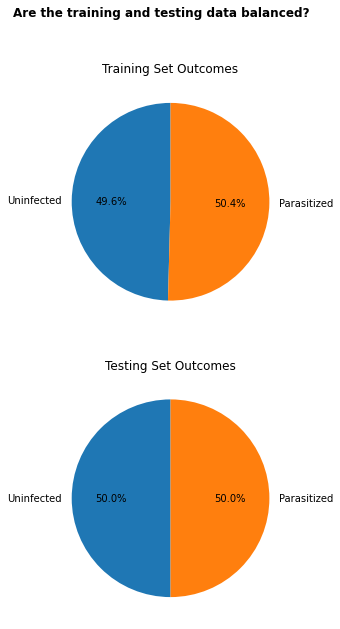

In [46]:
# now I'm ready to create a figure with two pie-plots
# You are free to use bar plot or pie-plot or count plot, etc. to plot the labels of train and test data and check if they are balanced

# to plot, first I define a figure with dimensions (rows,columns)
# ax1, ax2 are the two charts
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(10,10))
fig.suptitle('Are the training and testing data balanced?',weight='bold')

labels = 'Uninfected','Parasitized'
sizestrain = [trainlno,trainlct]
ax1.pie(sizestrain,labels = labels,autopct='%1.1f%%', startangle=90) #plot 1st pie
ax1.set_title('Training Set Outcomes')

sizestest = [testlno,testlct]
ax2.pie(sizestest,labels = labels,autopct='%1.1f%%', startangle=90) #plot 2nd pie
ax2.set_title('Testing Set Outcomes')

plt.show()


####<b> Observations and insights: _____

### <b>Data Exploration</b>
Let's visualize the images from the train data

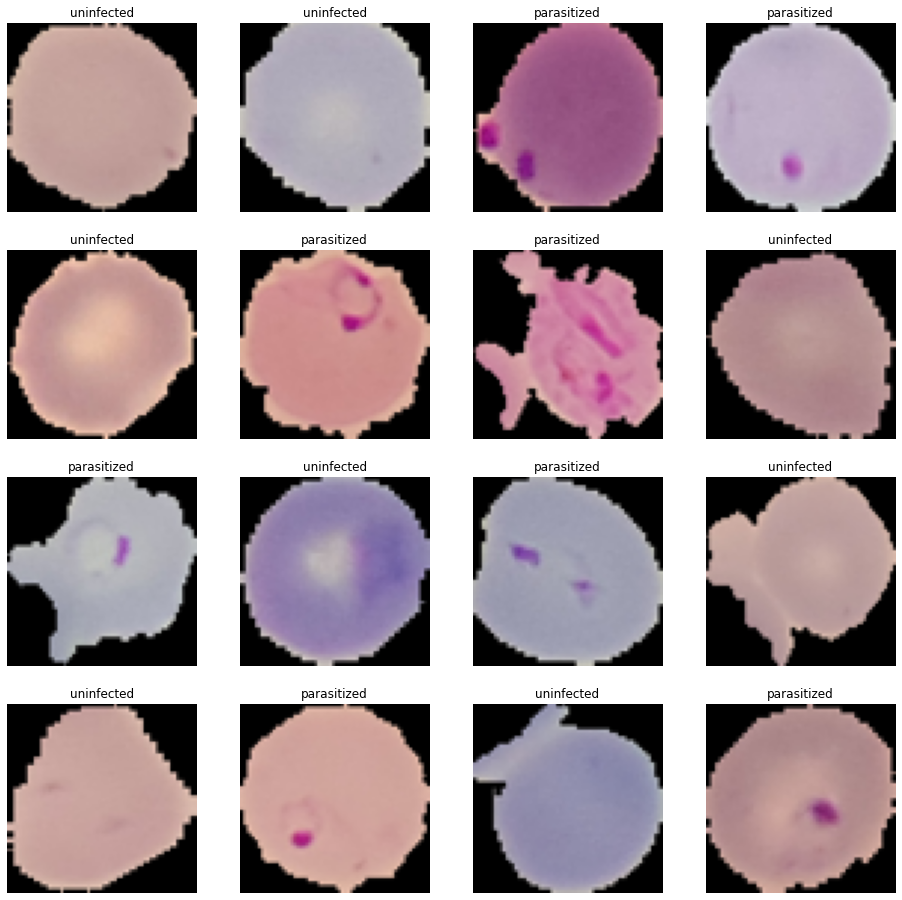

In [48]:
# This code will help you in visualizing both the parasitized and uninfected images
np.random.seed(42)

plt.figure(1, figsize = (16 , 16))

for n in range(1, 17):

    plt.subplot(4, 4, n)

    index = int(np.random.randint(0, train_images.shape[0], 1))

    if train_labels[index] == 1: 

        plt.title('parasitized')

    else:
        plt.title('uninfected')

    plt.imshow(train_images[index])

    plt.axis('off')

####<b> Observations and insights: _____

###<b> Similarly visualize the images with subplot(6, 6) and figsize = (12, 12)

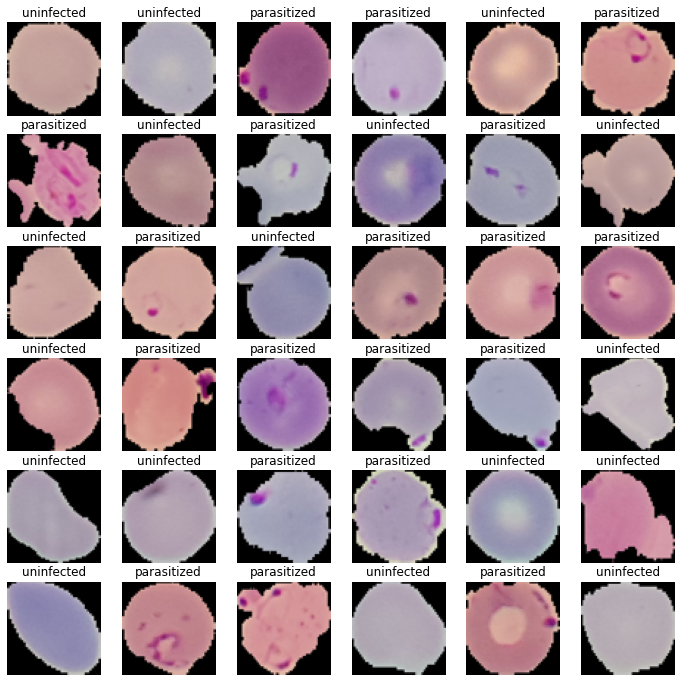

In [49]:
# Hint: Have a keen look into the number of iterations that the for loop should iterate

np.random.seed(42)

plt.figure(1, figsize = (12 , 12))

for n in range(1, 37):

    plt.subplot(6, 6, n)

    index = int(np.random.randint(0, train_images.shape[0], 1))

    if train_labels[index] == 1: 

        plt.title('parasitized')

    else:
        plt.title('uninfected')

    plt.imshow(train_images[index])

    plt.axis('off')



####<b>Observations and insights:

###<b> Plotting the mean images for parasitized and uninfected

In [52]:
# Function to find the mean
def find_mean_img(full_mat, title):

    # Calculate the average
    mean_img = np.mean(full_mat, axis = 0)[0]

    # Reshape it back to a matrix
    plt.imshow(mean_img)

    plt.title(f'Average {title}')

    plt.axis('off')

    plt.show()

    return mean_img

<b> Mean image for parasitized

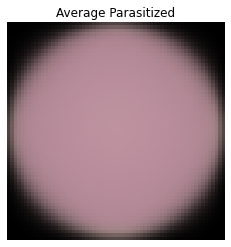

In [51]:
# If the label = 1 then the image is parasitised and if the label = 0 then the image is uninfected
parasitized_data = []  # Create a list to store the parasitized images' data

for img, label in zip(train_images, train_labels):

        if label == 1:
              
              parasitized_data.append([img])          

parasitized_mean = find_mean_img(np.array(parasitized_data), 'Parasitized')   # find the mean

<b> Mean image for uninfected

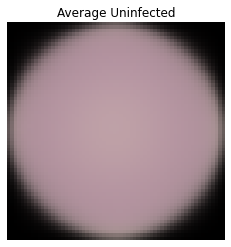

In [54]:
# Similarly write the code to find the mean image of uninfected (will have label = 0)

uninfected_data = []  # Create a list to store the uninfected images' data

for img, label in zip(train_images, train_labels):

        if label == 0:
              
              uninfected_data.append([img])          

uninfected_mean = find_mean_img(np.array(uninfected_data), 'Uninfected')   # find the mean


####<b> Observations and insights: _____

### <b>Converting RGB to HSV of Images using OpenCV

###<b> Converting the train data

In [55]:
import cv2

gfx=[]   # to hold the HSV image array

for i in np.arange(0, 100, 1):

  a = cv2.cvtColor(train_images[i], cv2.COLOR_BGR2HSV)
  
  gfx.append(a)

gfx = np.array(gfx)

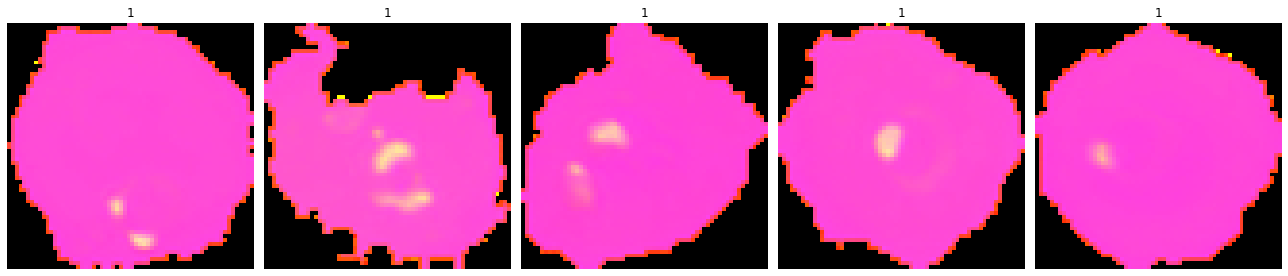

In [56]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = train_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(gfx[i])

  ax[t].set_axis_off()
  
  fig.tight_layout()

###<b> Converting the test data

In [57]:
# Similarly you can visualize for the images in the test data

# first step, now for the test data

gfx=[]   # to hold the HSV image array

for i in np.arange(0, 100, 1):

  a = cv2.cvtColor(test_images[i], cv2.COLOR_BGR2HSV)
  
  gfx.append(a)

gfx = np.array(gfx)


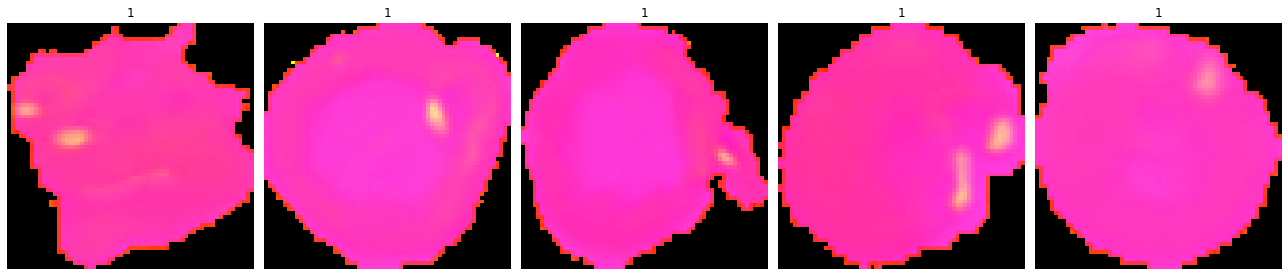

In [58]:
# second step, to display the converted test images

viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = test_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(gfx[i])

  ax[t].set_axis_off()
  
  fig.tight_layout()

####<b>Observations and insights: _____

###<b> Processing Images using Gaussian Blurring

###<b> Gaussian Blurring on train data

In [59]:
gbx = []  # To hold the blurred images

for i in np.arange(0, 100, 1):

  b = cv2.GaussianBlur(train_images[i], (5, 5), 0)

  gbx.append(b)

gbx = np.array(gbx)

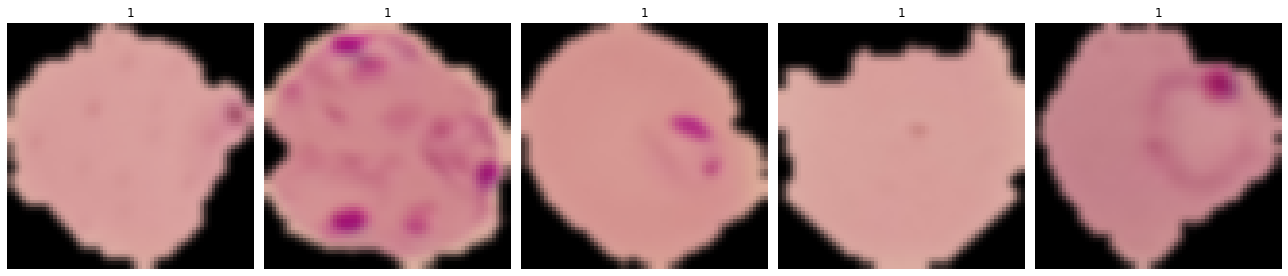

In [60]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = train_labels[i]

  ax[t].set_title(Title)

  
  ax[t].imshow(gbx[i])
  
  ax[t].set_axis_off()
  
  fig.tight_layout()

###<b> Gaussian Blurring on test data

In [61]:
# Similarly you can apply Gaussian blurring for the images in the test data

# first step, now for the test data
gbx = []  # To hold the blurred images

for i in np.arange(0, 100, 1):

  b = cv2.GaussianBlur(test_images[i], (5, 5), 0)

  gbx.append(b)

gbx = np.array(gbx)


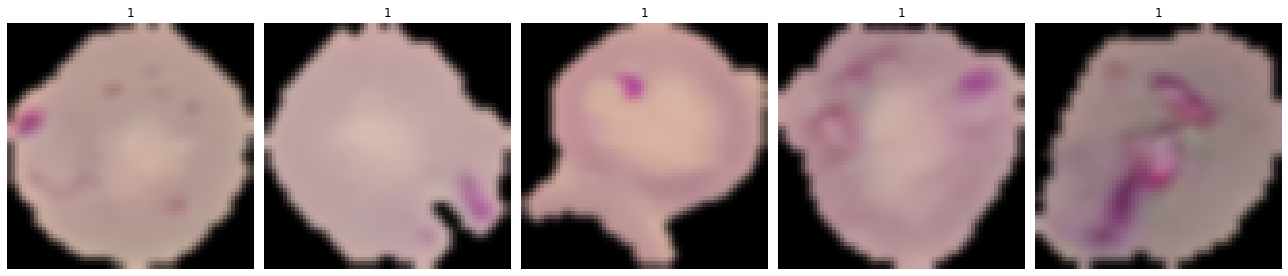

In [62]:
# second step, to display the blurred test images

viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = test_labels[i]

  ax[t].set_title(Title)

  
  ax[t].imshow(gbx[i])
  
  ax[t].set_axis_off()
  
  fig.tight_layout()

####**Observations and insights: _____**

**Think About It:** Would blurring help us for this problem statement in any way? What else can we try?

## **Proposed approach**

**Potential techniques:** What different techniques should be explored?<br>
**Overall solution design:** What is the potential solution design?<br>
**Measures of success:** What are the key measures of success to compare different techniques?<br>